# All State Insurance Claim Prediction

### Included in this project:

<ul>
<li>Dataset overview</li>
<li>Exploratory data analysis</li>
<li>Data cleaning and Pre-Processing</li>
<li>Outlier treatment</li>
<li>Feature selection techniques</li>
<li>Machine learning models</li>
<li>Hyperparameter tuning</li>
<li>Model validation</li>
<li>Deployment using Flask API</li>
</ul>

***

##### Import the packages and load the training data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle

#modify the display options to view entire dataframe
pd.options.display.max_columns = None

In [2]:
train_data = pd.read_csv("train.csv")

##### Doing the following:
<ul>
<li>Analyze the size of training data</li>
<li>Verify the first few observations</li>
<li>Check the column headers</li>
</ul>


In [3]:
# check for the shape of train data
train_data.shape

(188318, 132)

In [4]:
# check for first 5 rows
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
# check for all the columns present
column_names = np.array(train_data.columns)
print(column_names)

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

***

###### Identify the categorical and numerical columns to check the data distribution and 5 point summary

In [6]:
column_datatypes = train_data.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
continuous_columns = list(column_datatypes[column_datatypes=="float64"].index.values)
continuous_columns.remove('loss')

##### check the distribution of categorical variables

In [7]:
#function to check the distribution of values in categorical columns
#Training data and Categorical columns list
def category_distribution(train_data,categorical_columns):
    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(train_data[cat_column].value_counts())
    return(categorical_column_distribution)

In [8]:
# check for categorical column distribution
categorical_column_distribution = category_distribution(train_data,categorical_columns)

In [9]:
categorical_column_distribution

[A    141550
 B     46768
 Name: cat1, dtype: int64,
 A    106721
 B     81597
 Name: cat2, dtype: int64,
 A    177993
 B     10325
 Name: cat3, dtype: int64,
 A    128395
 B     59923
 Name: cat4, dtype: int64,
 A    123737
 B     64581
 Name: cat5, dtype: int64,
 A    131693
 B     56625
 Name: cat6, dtype: int64,
 A    183744
 B      4574
 Name: cat7, dtype: int64,
 A    177274
 B     11044
 Name: cat8, dtype: int64,
 A    113122
 B     75196
 Name: cat9, dtype: int64,
 A    160213
 B     28105
 Name: cat10, dtype: int64,
 A    168186
 B     20132
 Name: cat11, dtype: int64,
 A    159825
 B     28493
 Name: cat12, dtype: int64,
 A    168851
 B     19467
 Name: cat13, dtype: int64,
 A    186041
 B      2277
 Name: cat14, dtype: int64,
 A    188284
 B        34
 Name: cat15, dtype: int64,
 A    181843
 B      6475
 Name: cat16, dtype: int64,
 A    187009
 B      1309
 Name: cat17, dtype: int64,
 A    187331
 B       987
 Name: cat18, dtype: int64,
 A    186510
 B      1808
 Name: cat1

In [10]:
length_categorical_columns = list(map(lambda x:len(x),categorical_column_distribution))

In [11]:
#count the number of columns having the same number of unique values
distribution_dict = dict()
for val in length_categorical_columns:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val]=1

In [12]:
distribution_dict

{2: 72,
 3: 4,
 4: 12,
 8: 3,
 7: 4,
 5: 3,
 16: 2,
 15: 1,
 19: 2,
 9: 1,
 13: 1,
 17: 2,
 20: 2,
 11: 1,
 84: 1,
 131: 1,
 51: 1,
 61: 1,
 23: 1,
 326: 1}

### Plot a bar-graph

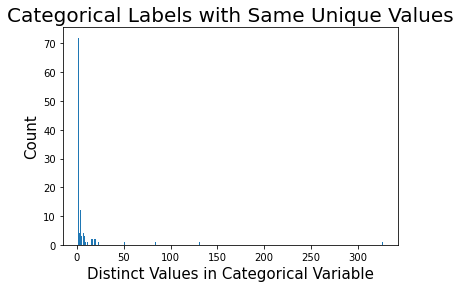

In [13]:
#plot showing the count of columns having same number of unique values
keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values,width=0.8)
plt.xlabel('Distinct Values in Categorical Variable', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Categorical Labels with Same Unique Values',fontsize=20)
plt.rcParams['figure.figsize'] = [48/2.54, 10/2.54]
plt.show()

##### check the distribution of continuous variables

In [14]:
#filter out the continous columns and view the descriptive statistics
train_data[continuous_columns].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


***

#### Data cleaning and pre-processing

In [15]:
#Check if there is any missing value in the columuns
#value of 0 indicates no missing values
missing_values = train_data.isnull().sum()
np.max(missing_values)

0

In [16]:
#Manually insert a blank value across 5 rows
total_rows = train_data.shape[0]
columns_with_blanks_cat = np.random.randint(1,116,2)
columns_with_blanks_cont = np.random.randint(117,130,3)
columns_with_blank = np.append(columns_with_blanks_cat,columns_with_blanks_cont)

#for every column insert 5 blanks at random locations
for col in columns_with_blank:
    rows_with_blanks = np.random.randint(1,total_rows,5)
    train_data.iloc[rows_with_blanks,col] = np.nan

In [17]:
#Validate the number of columns with missing values
missing_values = train_data.isnull().sum()
np.max(missing_values)

5

In [18]:
#Displaying the columns with missing values
columns_with_missing = train_data.columns[train_data.isnull().any()]
print(columns_with_missing)

Index(['cat83', 'cat98', 'cont5', 'cont6', 'cont9'], dtype='object')


##### Data Preprocessing class with the following functions:
<ul>
    <li><b>missing_value_continuous</b>: function to handle missing values of continuous variables</li>
    <li><b>missing_value_categorical</b>: function to handle missing values of categorical variables</li>
    <li><b>outlier_treatment</b>: function to handle continuous outliers in the dataset</li>
</ul>

In [19]:
class Data_preprocessing:
    def __init__(self,train_data):
        self.train_data = train_data
    
    def missing_value_continuous(self,column_names_with_specific_type,imputation_type="mean"): # null value imputation with mean value
        if imputation_type=="mean": # mean imputation 
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            mean_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=mean_imputer.transform(self.train_data[column_names_with_specific_type])
        if imputation_type=="median": # median imputation
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            median_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=median_imputer.transform(self.train_data[column_names_with_specific_type])
        return self.train_data
    
    def missing_value_categorical(self,column_names_with_specific_type,imputation_type="most_frequent"): # check for missing categorical column values
        most_frequent = SimpleImputer(strategy="most_frequent")
        most_frequent.fit(self.train_data[column_names_with_specific_type])
        self.train_data[column_names_with_specific_type] = most_frequent.transform(train_data[column_names_with_specific_type])
        return self.train_data
    
    def outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action): # outlier treatmenr
        if action=="median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                meadian_outlier = np.median(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=meadian_outlier
        if action=="mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=mean_outlier
        if action=="remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train_data = self.train_data[~((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train_data

In [20]:
#apply data preprocessing
Data_preprocessing_obj = Data_preprocessing(train_data)
train_data = Data_preprocessing_obj.missing_value_continuous(continuous_columns,"median")
train_data = Data_preprocessing_obj.missing_value_categorical(categorical_columns)

***

##### Section on handling outliers in the dataset

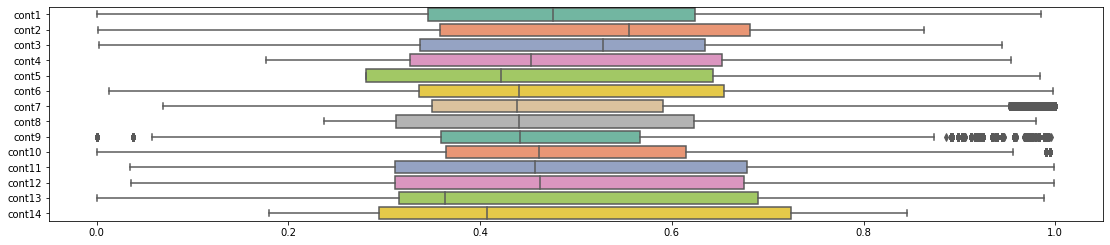

In [21]:
# plot boxplots to check the outliers
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

In [22]:
# our columns with outliers
columns_with_outlier = ['cont7','cont9','cont10']

In [23]:
#compute the interquartile range for all continuous columns
Q1 = train_data[continuous_columns].quantile(0.25)
Q3 = train_data[continuous_columns].quantile(0.75)
IQR = (Q3-Q1)
train_data = Data_preprocessing_obj.outlier_treatment(Q1,Q3,IQR,columns_with_outlier,"median")

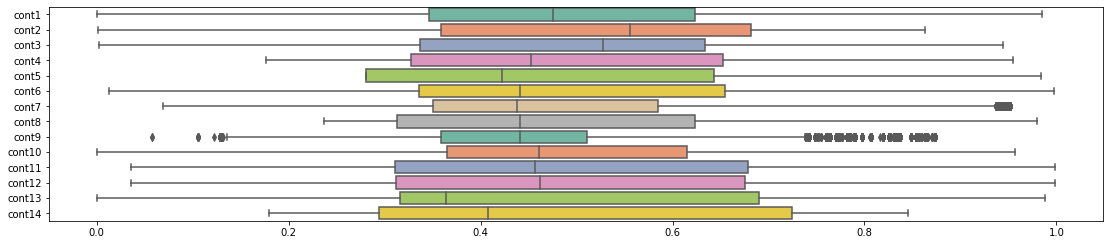

In [24]:
# plot boxplot 
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

***

##### Feature elimination techniques for continuous and categorical features

In [25]:
#Function for feature selection of numeric variables
#Remove variables with constant variance
#Remove variables with Quasi-Constant variance with a fixed threshold
#Remove correlated variables

def feature_selection_numerical_variables(train_data,qthreshold,corr_threshold,exclude_numerical_cols_list):
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns = list(train_data.select_dtypes(include=num_colums).columns)
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    #remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train_data[numerical_columns])
    constant_columns = [column for column in train_data[numerical_columns].columns 
                    if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train_data.drop(labels=constant_columns, axis=1, inplace=True)

    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
        
    #remove variables with qconstant variance
    #Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train_data[numerical_columns])
    qconstant_columns = [column for column in train_data[numerical_columns].columns 
                         if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train_data.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]
    
    #remove correlated variables
    correlated_features = set()
    correlation_matrix = train_data[numerical_columns].corr()
    ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
    #print(correlation_matrix)
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train_data.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train_data,constant_columns,qconstant_columns,correlated_features
    

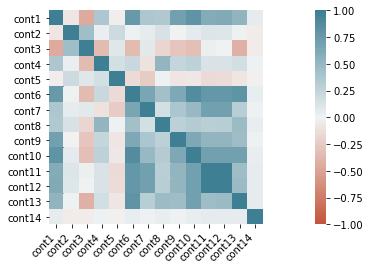

In [26]:
train_data,constant_columns,qconstant_columns,correlated_features =feature_selection_numerical_variables(train_data,0.01,0.75,['loss','id'],)

In [27]:
correlated_features

{'cont10', 'cont12', 'cont6'}

##### Handling correlation between categorical variables

In [28]:
# save the encoders to disk to be fitted on test data
for cf1 in categorical_columns:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    filename = cf1+".sav"
    pickle.dump(le, open(filename, 'wb'))
    train_data[cf1] = le.transform(train_data[cf1])

In [29]:
#snippet to calculate the unique values with a categorical columns
df = pd.DataFrame(columns=["Column_Name","Count"])
for cat in categorical_columns:
    unique_value_count = len(train_data[cat].unique())
    df = df.append({'Column_Name': cat, "Count":int(unique_value_count)}, ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)

In [30]:
#snippet to identify the dependent/correlated categorical variables and drop them
columns_to_drop_cat = set()
correlated_columns = dict()
for unique_value_count in columns_unique_value:
    if unique_value_count>1:
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train_data[columns_compare_against],train_data[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [31]:
# drop columns that are not needed
train_data = train_data.drop(columns_to_drop_cat,axis=1)

In [34]:
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

#output the columns_to_drop file to a csv
columns_to_drop_df=pd.DataFrame(columns_to_drop,columns=['colnames'])
columns_to_drop_df.to_csv("/model/columns_to_drop.csv",index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/model/columns_to_drop.csv'

***

##### Visualizing the Output Variable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

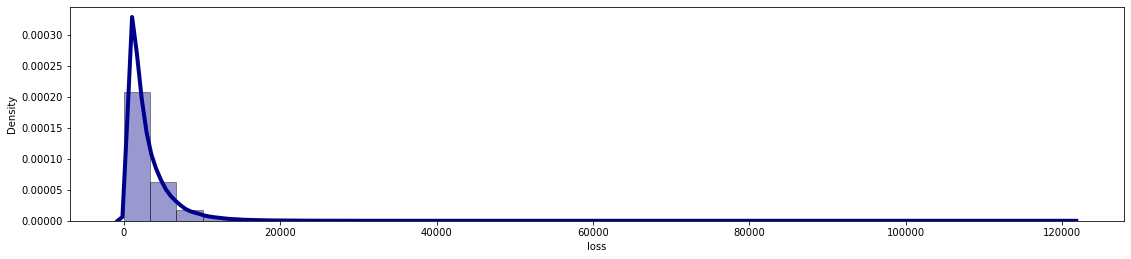

In [35]:
#Visualizing the distribution of loss value
# Density Plot and Histogram of loss
sns.distplot(train_data['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [36]:
#We will use a log transformation on the dependent variable to reduce the scale
train_data['loss'] = np.log(train_data['loss'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

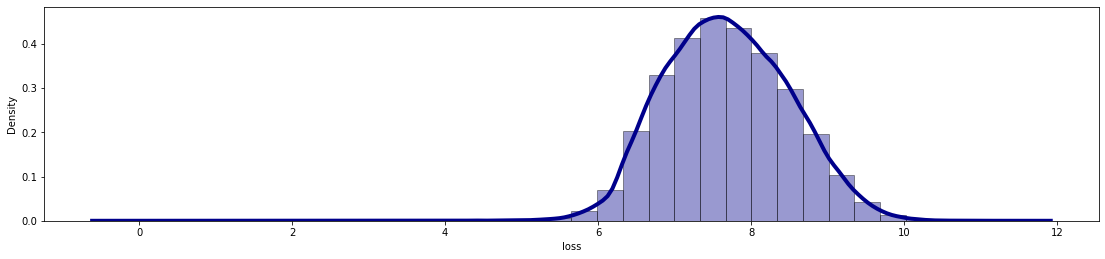

In [37]:
# Visualizing the distribution of loss value
# Density Plot and Histogram of loss
sns.distplot(train_data['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

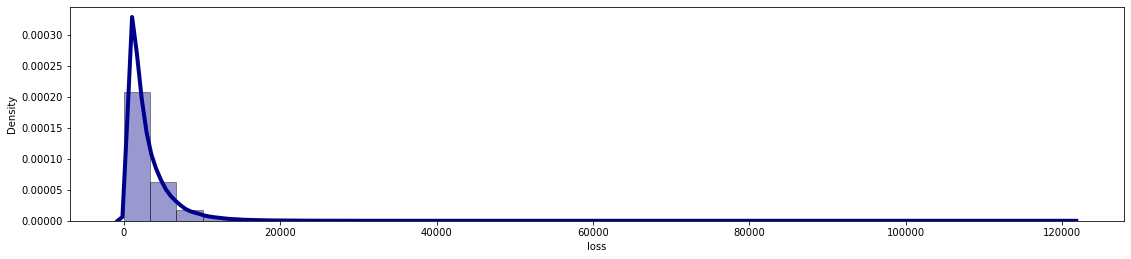

In [38]:
#taking a anti-log to transform the variable back to its original scale
sns.distplot(np.exp(train_data['loss']), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

***

##### Fit an ML Model

In [39]:
# import necessary models
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [40]:
#convert the int64 columns categorical
Column_datatypes= train_data.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)
train_data[Integer_columns] = train_data[Integer_columns].astype('category',copy=False)
X,y = train_data.drop(['id','loss'],axis=1),train_data['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # perform train test split

In [41]:
# Instantiate model with 100 decision trees
rf_base = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)
rf_base.fit(X_train, y_train) # fit the model

RandomForestRegressor(oob_score=True, random_state=42)

In [42]:
#save the model output
pickle.dump(rf_base, open("basemodel_rf", 'wb'))

In [43]:
#load the saved model and predict on the test data
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))

In [44]:
#validate the accuracy of the base model
#compare the model accuracies
Y_test_predict_base = basedmodel_rf.predict(X_test)
print("Base model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))

Base model accuracy: 0.6666074895621827


***

###### HyperParameter Tuning Using RandomSearchCV

In [45]:
#number of trees
n_estimators = [100,200,300,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [200,400,600]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [46]:
# Use the random grid to search for best hyperparameters
# base model to tune
rf = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [47]:
#check the best params
rf_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [48]:
#load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict_tuned = tunedmodel_rf.predict(X_test)
print("Tuned model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Tuned model accuracy: 0.6529123527508164


***

##### fit a GBM model

In [49]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
gbm_base = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)

gbm_base.fit(X_train,y_train) # fit the gbm moodel

#save the GBM model
pickle.dump(gbm_base, open("basemodel_GBM", 'wb'))

In [50]:
#load the saved model and predict on the test data
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))

Y_test_predict_tuned = basemodel_GBM.predict(X_test)
print("Base model GBM accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Base model GBM accuracy: 0.7004418131911399
